In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [8]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/2023_Spring/Advanced_Topics_in_DS/Project/small_processed_data/test_predictions.csv')
df = df.rename(columns={'high_pass_filter':'shallownet_high_pass_filter', 'high_pass_filter.1': 'xception_high_pass_filter'})
df = df.drop(columns='densenet_original')
df

,id,label,dataset_name,resnet_original,resnet_high_pass_filter,resnet_to_hsv,shallownet_original,shallownet_high_pass_filter,shallownet_to_hsv,xception_original,xception_high_pass_filter,xception_to_hsv,densenet_50,densenet_highPass_50,densenet_hsv_50
0,0,0,ffhq,0,0,0,1,1,0,0,0,0,0,0,0
1,2,0,ffhq,1,0,1,1,0,1,1,1,1,1,0,1
2,3,0,ffhq,0,1,0,1,1,0,1,0,0,1,0,1
3,8,0,ffhq,1,1,1,0,1,1,1,1,1,1,1,1
4,25,0,ffhq,0,0,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,3115,1,photoshop,1,1,1,1,1,0,1,1,0,1,0,1
716,3116,1,photoshop,0,0,1,1,1,1,0,0,0,1,0,1
717,3117,1,photoshop,1,0,1,1,1,1,1,1,0,1,1,1
718,3118,1,photoshop,1,1,0,0,0,0,0,1,1,0,1,0


In [43]:
from sklearn import metrics

true_labels = df['label']

original = []
hpf = []
hsv = []

acc_res_ori = metrics.accuracy_score(true_labels, df['resnet_original'])
original.append(acc_res_ori)
acc_res_hpf = metrics.accuracy_score(true_labels, df['resnet_high_pass_filter'])
hpf.append(acc_res_hpf)
acc_res_hsv = metrics.accuracy_score(true_labels, df['resnet_to_hsv'])
hsv.append(acc_res_hsv)

acc_shallow_ori = metrics.accuracy_score(true_labels, df['shallownet_original'])
original.append(acc_shallow_ori)
acc_shallow_hpf = metrics.accuracy_score(true_labels, df['shallownet_high_pass_filter'])
hpf.append(acc_shallow_hpf)
acc_shallow_hsv = metrics.accuracy_score(true_labels, df['shallownet_to_hsv'])
hsv.append(acc_shallow_hsv)

acc_xception_ori = metrics.accuracy_score(true_labels, df['xception_original'])
original.append(acc_xception_ori)
acc_xception_hpf = metrics.accuracy_score(true_labels, df['xception_high_pass_filter'])
hpf.append(acc_xception_hpf)
acc_xception_hsv = metrics.accuracy_score(true_labels, df['xception_to_hsv'])
hsv.append(acc_xception_hsv)

acc_dense_ori = metrics.accuracy_score(true_labels, df['densenet_50'])
original.append(acc_dense_ori)
acc_dense_hpf = metrics.accuracy_score(true_labels, df['densenet_highPass_50'])
hpf.append(acc_dense_hpf)
acc_dense_hsv = metrics.accuracy_score(true_labels, df['densenet_hsv_50'])
hsv.append(acc_dense_hsv)

#automl
original.append(0.775)
hpf.append(0.6375)
hsv.append(0.6945)

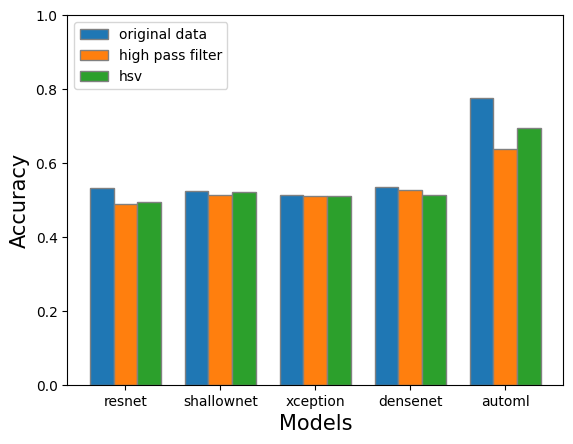

In [46]:
import numpy as np
import matplotlib.pyplot as plt

barWidth = 0.25
# fig = plt.subplots(figsize =(12, 8))
 
# Set position of bar on X axis
br1 = np.arange(len(original))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, original, width = barWidth,
        edgecolor ='grey', label ='original data')
plt.bar(br2, hpf, width = barWidth,
        edgecolor ='grey', label ='high pass filter')
plt.bar(br3, hsv, width = barWidth,
        edgecolor ='grey', label ='hsv')
 
# Adding Xticks
plt.xlabel('Models', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(original))],
        ['resnet', 'shallownet', 'xception', 'densenet', 'automl'])

plt.ylim(0, 1)

plt.legend(loc='upper left')
plt.show()

In [19]:
resnet = df[['label','dataset_name','resnet_original','resnet_high_pass_filter','resnet_to_hsv']]
resnet

,label,dataset_name,resnet_original,resnet_high_pass_filter,resnet_to_hsv
0,0,ffhq,0,0,0
1,0,ffhq,1,0,1
2,0,ffhq,0,1,0
3,0,ffhq,1,1,1
4,0,ffhq,0,0,1
...,...,...,...,...,...
715,1,photoshop,1,1,1
716,1,photoshop,0,0,1
717,1,photoshop,1,0,1
718,1,photoshop,1,1,0


In [24]:
subgroups = resnet['dataset_name'].unique().tolist()
subgroups

['ffhq',
 'celebahq',
 'taming_transformer',
 'sfhq',
 'gansformer',
 'stylegan2',
 'projected_gan',
 'stylegan3',
 'photoshop']

In [25]:
accs = []

for subgroup in subgroups:
    y_pred = df[df['dataset_name']==subgroup]['resnet_original']
    y_true = df[df['dataset_name']==subgroup]['label']
    accs.append(metrics.accuracy_score(y_true, y_pred))

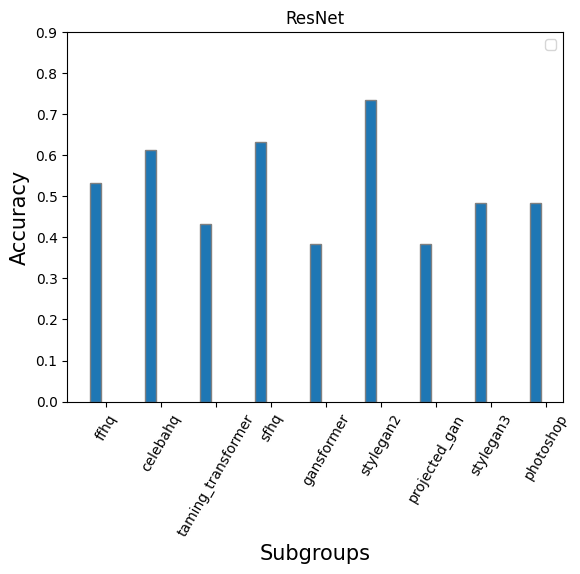

In [42]:
import numpy as np
import matplotlib.pyplot as plt

barWidth = 0.2
# fig = plt.subplots(figsize =(12, 8))
 
# Set position of bar on X axis
br1 = np.arange(len(accs))
 
# Make the plot
plt.bar(br1, accs, width = barWidth,
        edgecolor ='grey')
 
# Adding Xticks
plt.xlabel('Subgroups', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(accs))],
        subgroups, rotation = 60)

plt.ylim(0, 0.9)

plt.title('ResNet')
plt.legend()
plt.show()

In [34]:
#automl

automl = pd.read_csv('/content/drive/MyDrive/2023_Spring/Advanced_Topics_in_DS/Project/small_processed_data/batch_predict.csv')
automl

,id,label,dataset_name,prediction,confidence
0,0,real,ffhq,real,0.999994
1,2,real,ffhq,fake,0.691775
2,3,real,ffhq,real,0.534157
3,8,real,ffhq,real,0.839885
4,25,real,ffhq,fake,0.685235
...,...,...,...,...,...
715,3115,fake,photoshop,fake,0.834405
716,3116,fake,photoshop,real,0.998698
717,3117,fake,photoshop,fake,0.561388
718,3118,fake,photoshop,real,1.000000


In [36]:
accs_automl = []

for subgroup in subgroups:
    y_pred = automl[automl['dataset_name']==subgroup]['prediction']
    y_true = automl[automl['dataset_name']==subgroup]['label']
    accs_automl.append(metrics.accuracy_score(y_true, y_pred))

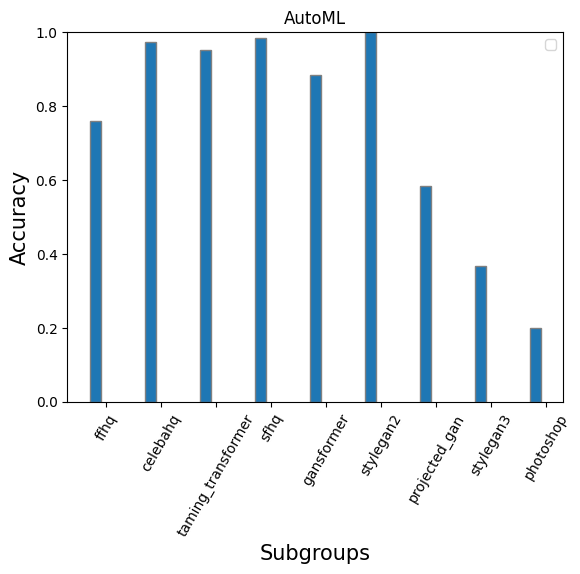

In [41]:
import numpy as np
import matplotlib.pyplot as plt

barWidth = 0.2
# fig = plt.subplots(figsize =(12, 8))
 
# Set position of bar on X axis
br1 = np.arange(len(accs_automl))
 
# Make the plot
plt.bar(br1, accs_automl, width = barWidth,
        edgecolor ='grey')
 
# Adding Xticks
plt.xlabel('Subgroups', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(accs_automl))],
        subgroups, rotation = 60)

plt.ylim(0, 1)

plt.title('AutoML')
plt.legend()
plt.show()